|████████████████████████████████████████████████| 100.0% ◆ elapsed 2.95ms ◆ remaining 0.00ms


QArray: shape=(2, 2), dims=(2, 1), dtype=complex64, layout=dense
[[0.0000000e+00+0.000000e+00j 4.6064574e-16+7.721896e-12j]
 [4.6064574e-16-7.721896e-12j 0.0000000e+00+0.000000e+00j]]


100%|██████████████████████████████████████████████████████| 120/120 [00:05<00:00, 21.57it/s]


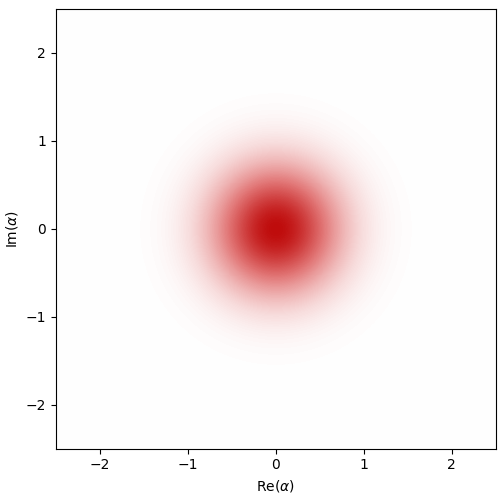

In [1]:
#Task 2.1

import dynamiqs as dq
import jax.numpy as jnp
import math
import scipy
kappa_a = 9.3 * 10**3 # relaxation rate of mode a
kappa_b = 2.6 * 10**6 # relaxation rate of mode b

pi = math.pi
h = scipy.constants.h
# h = 1.0
omega_a0 = 5.26*10**9*2*pi
omega_b0 = 7.70*10**9*2*pi
phi_a = 0.06
phi_b = 0.29
# Ej = 42.76*10**9*h
Ej = 12.03*10**9*h
dEj = 0.47*10**9*h
omega_d = 7.623*10**9*2*pi
omega_p = 2.891*10**9*2*pi
epsilon_d = -3.815*10**6*2*pi
epsilon_p = 0.122
 
na = 2 # Hilbert space size
nb = 1 # Hilbert space size

a, b = dq.destroy(na, nb)
# ac, bc = dq.create(na, nb)

adag = a.dag() # creation operator
bdag = b.dag() # creation operator

psi0 = dq.fock((na,nb), (0,0)) # initial state

phi_hat = phi_a*(a + adag) + phi_b*(b + bdag)

H_d = dq.timecallable(lambda t: 2*epsilon_d*jnp.cos(omega_d * t)*(b + bdag))
H_0 = omega_a0 * adag @ a + omega_b0 * bdag @ b
H_ats = dq.timecallable(lambda t: -2.0 * Ej * (epsilon_p * jnp.sin(omega_p * t)) * phi_hat + 1.0/3.0*Ej*(epsilon_p * jnp.sin(omega_p * t))*( phi_hat @ phi_hat @ phi_hat) + 2.0 * dEj*dq.eye(na,nb) - dEj*((epsilon_p * jnp.sin(omega_p * t)*dq.eye(na,nb))@(epsilon_p * jnp.sin(omega_p * t)*dq.eye(na,nb)) + phi_hat @ phi_hat))

H = H_0 + H_d + H_ats

tsave = jnp.linspace(0, 10e-6, 200)

res = dq.mesolve(H, [jnp.sqrt(kappa_a)*a + jnp.sqrt(kappa_b)*b], psi0, tsave)

print(res.states[-1] - res.states[0])
dq.plot.wigner_gif(res.states.ptrace(0), fps = 24, xmax=2.5)